<a href="https://colab.research.google.com/github/Guillermo100472109/Aprendizaje-Automatico/blob/main/Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRANTES:
G84
Guillermo García Ortega 100472109
Asier Martínez García 100500449

Documentos usados:

attrition_competition_09.csv
attrition_availabledata_09.csv

# EDA
Realice un EDA simplificado, principalmente para determinar cúantas variables e instancias hay, qué
variables son categóricas/ordinales/numéricas, si hay variables categóricas con alta cardinalidad, qué
variables tienen valores faltantes y cuántos, si hay columnas constantes o columnas de ID, y si se trata
de un problema de regresión o clasificación. Si es esto último, ¿está desbalanceado?
Este EDA se utilizará como guía cuando haya que llevar a cabo el preproceso de los datos.
https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [54]:
df = pd.read_csv('attrition_availabledata_09.csv')
df


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,Y,11,8,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,Y,18,8,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,Y,14,8,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,Y,14,8,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,Y,21,8,0,5.0,3,4,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.622518,16,2,4,1.0,2.0,2.0,50,Travel_Rarely,Sales,...,Y,23,8,0,28.0,2,10,1,6,No
2936,9.553096,4,3,3,4.0,2.0,3.0,41,Travel_Rarely,Research & Development,...,Y,19,8,2,8.0,0,5,1,2,No
2937,6.734752,19,1,3,2.0,2.0,4.0,40,Travel_Rarely,Research & Development,...,Y,12,8,0,7.0,2,5,1,3,No
2938,8.035525,14,2,3,3.0,4.0,3.0,44,Travel_Rarely,Research & Development,...,Y,12,8,0,8.0,2,2,2,2,No


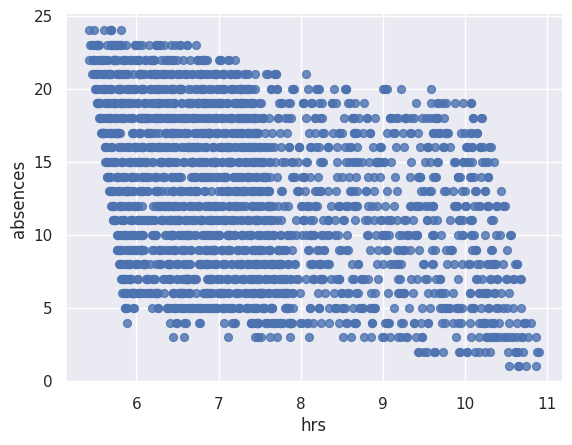

In [55]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hrs', y='absences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se interpreta que las abstenciones laborales son anuales y las horas la media de horas trabajadas diaria. Las personas que trabajan menos de las 8 horas diarias correspondientes de media tienen mayor núemero de abstenciones, acalando así que cuanto más veces faltas al trabajo menos horas de media semanal tienes.

In [56]:
df.count()

hrs                        2940
absences                   2940
JobInvolvement             2940
PerformanceRating          2940
EnvironmentSatisfaction    2923
JobSatisfaction            2928
WorkLifeBalance            2911
Age                        2940
BusinessTravel             2940
Department                 2940
DistanceFromHome           2940
Education                  2940
EducationField             2940
EmployeeCount              2940
EmployeeID                 2940
Gender                     2940
JobLevel                   2940
JobRole                    2940
MaritalStatus              2940
MonthlyIncome              2940
NumCompaniesWorked         2930
Over18                     2940
PercentSalaryHike          2940
StandardHours              2940
StockOptionLevel           2940
TotalWorkingYears          2935
TrainingTimesLastYear      2940
YearsAtCompany             2940
YearsSinceLastPromotion    2940
YearsWithCurrManager       2940
Attrition                  2940
dtype: i

In [57]:
df.count(axis='columns')

0       31
1       31
2       31
3       31
4       31
        ..
2935    31
2936    31
2937    31
2938    31
2939    31
Length: 2940, dtype: int64

**IMPORTANTE: ELIMINAR ESTAS MISMAS COLUMNAS EN LOS DATOS DE COMPETICIÓN**

Columnas superfluas: gender, employeecount, over18, employeeID, standardHours

In [58]:
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
df.head(5)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,100960,0.0,11,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,109650,1.0,18,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,31800,1.0,14,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,20860,4.0,14,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,25590,1.0,21,0,5.0,3,4,1,0,Yes


In [59]:
df.shape

(2940, 26)

In [60]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


In [61]:
print(df.isnull().sum())

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    17
JobSatisfaction            12
WorkLifeBalance            29
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         10
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64


Se observa que del conjunto total de datos hay 2940 líneas totales, pero hay varias variables que no tienen todos esos datos. Hay que eliminar las filas sin esos datos.

In [62]:
df = df.dropna()
print(df.isnull().sum())

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64


Se han borrados todos los valores null

In [63]:
df.count()

hrs                        2868
absences                   2868
JobInvolvement             2868
PerformanceRating          2868
EnvironmentSatisfaction    2868
JobSatisfaction            2868
WorkLifeBalance            2868
Age                        2868
BusinessTravel             2868
Department                 2868
DistanceFromHome           2868
Education                  2868
EducationField             2868
JobLevel                   2868
JobRole                    2868
MaritalStatus              2868
MonthlyIncome              2868
NumCompaniesWorked         2868
PercentSalaryHike          2868
StockOptionLevel           2868
TotalWorkingYears          2868
TrainingTimesLastYear      2868
YearsAtCompany             2868
YearsSinceLastPromotion    2868
YearsWithCurrManager       2868
Attrition                  2868
dtype: int64

Ahora ya tenemos todas las filas completas

<Axes: xlabel='hrs'>

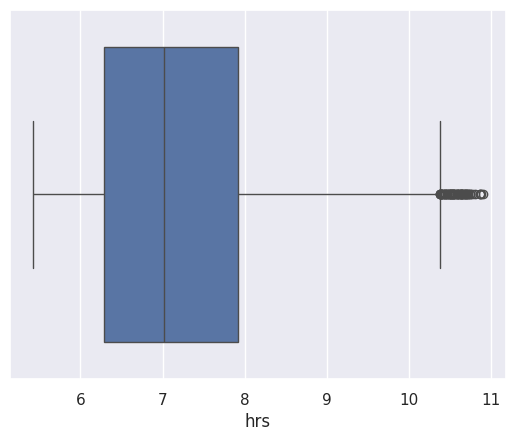

In [64]:
sns.boxplot(x=df['hrs'])

Vemos que hay un grupo de outliers, veamos la relación más de cerca.

<Axes: xlabel='hrs', ylabel='absences'>

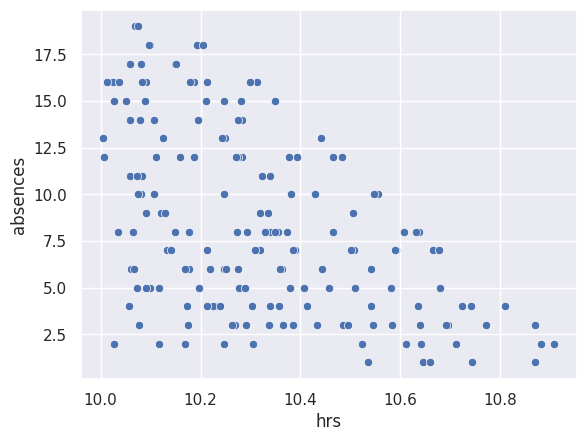

In [65]:
filtered_df = df[df['hrs'] > 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

<Axes: xlabel='hrs', ylabel='absences'>

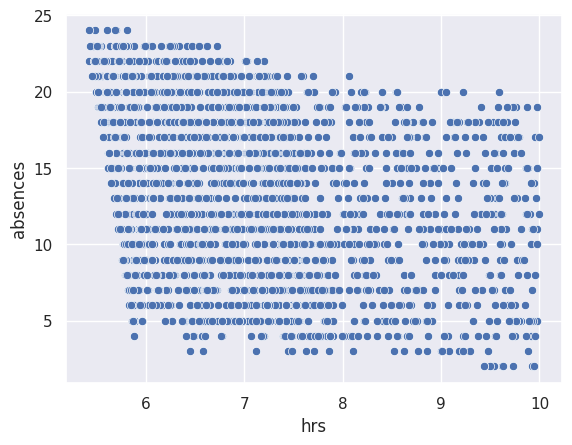

In [66]:
filtered_df = df[df['hrs'] < 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

No podemos sacar conclusiones sobre esta relación, asi que seguimos investigando posibles relaciones.
Ahora veremos si el estado civil influye en el número de faltas

<Axes: xlabel='MaritalStatus', ylabel='absences'>

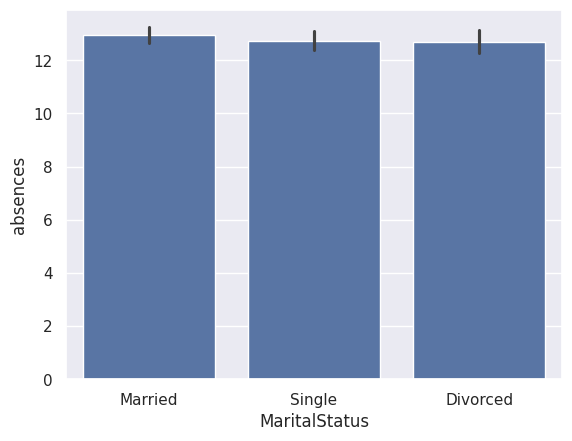

In [67]:
sns.barplot(x='MaritalStatus', y='absences', data=df, estimator=np.mean)


No se ve una relación clara entre el estado civil y el número de faltas, por tanto no es una columna interesante


Para finalizar el EDA vamos a comprobar el balance de la columna Attrition.

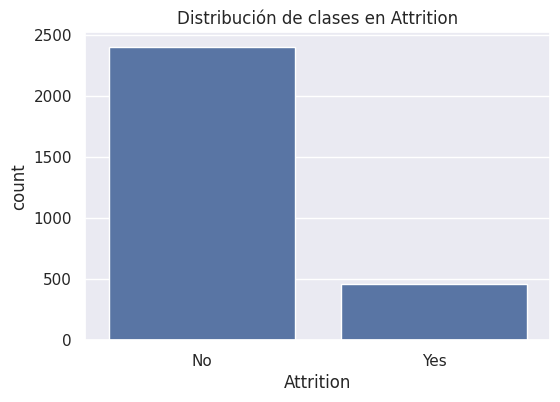


Proporciones:
Attrition
No     0.838215
Yes    0.161785
Name: proportion, dtype: float64


In [68]:
# Gráfico de distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribución de clases en Attrition')
plt.show()

# Proporciones exactas
attrition_counts = df['Attrition'].value_counts(normalize=True)
print(f"\nProporciones:\n{attrition_counts}")

El análisis del desbalance de clases revela que la variable objetivo 'Attrition' presenta una distribución desigual, con aproximadamente un 84% de empleados que no abandonan ('No') y solo un 16% que sí lo hacen ('Yes'). Este desbalance nos indica que encontrar un modelo con un balance_accuray superior al 84% es crucial para crear un modelo correcto, ya que un modelo con balance_accuracy inferior a 84% será superado por el modelo dummy, que asumiría NO siempre y acertaría con un 84% de probabilidades, indicando que el modelo dummy es mejor que nuestro modelo, en caso de que no podamos superar este umbral.

Tras mirar varias posibles columnas superflas sin encontrar resultados. Hemos terminado el EDA simplificado. Ahora tenemos los datos limpios para poder crear los modelos correspondientes.

# Elección de  Evaluación

Para garantizar una evaluación robusta y confiable del rendimiento del modelo, se adoptará un esquema de evaluación en dos niveles: una evaluación externa (outer) para estimar el rendimiento futuro del modelo y una evaluación interna (inner) para la selección y optimización de modelos.

3.1 Evaluación Externa

La estimación del rendimiento futuro del modelo se llevará a cabo utilizando la estrategia de Holdout, con una partición de los datos en train (2/3) y test (1/3). El objetivo es disponer de un conjunto de test  que no haya sido utilizado durante el proceso de entrenamiento ni en la selección del modelo, asegurando así una evaluación realista.

Las métricas principales a utilizar serán:

Balanced Accuracy: Adecuada en escenarios con desbalance de clases, ya que calcula el promedio entre la tasa de verdaderos positivos (TPR) y la tasa de verdaderos negativos (TNR).
True Positive Rate (TPR) y True Negative Rate (TNR): Para evaluar la precisión en la detección de la clase positiva y negativa, respectivamente.
Accuracy: Aunque es una métrica estándar, puede ser menos representativa en conjuntos de datos desbalanceados, por lo que se utilizará de manera complementaria.
Matriz de confusión: Para proporcionar una visualización detallada de los errores del modelo y evaluar posibles sesgos en la clasificación.
Es importante destacar que la partición de test se utilizará únicamente al final, cuando se haya decidido cuál es la mejor alternativa de modelado. Hasta ese momento, la evaluación se realizará exclusivamente en el conjunto de entrenamiento para evitar la fuga de datos y una sobreestimación del desempeño del modelo.

3.2 Evaluación Interna:

La evaluación interna se empleará para la optimización de hiperparámetros (Hyperparameter Optimization - HPO) y la comparación de distintos modelos. Para ello, se utilizarán técnicas de validación cruzada en el conjunto de entrenamiento, como:

K-Fold Cross-Validation: Dividiendo los datos de entrenamiento en k subconjuntos, entrenando el modelo en k-1 y validándolo en el restante, iterativamente.
Stratified K-Fold Cross-Validation: En caso de un desbalance de clases, se empleará una variante estratificada para mantener la proporción de clases en cada partición.
Este enfoque permitirá evaluar distintas configuraciones del modelo y seleccionar la mejor sin recurrir al conjunto de test, asegurando que el rendimiento final refleje la capacidad real del modelo para generalizar a datos no vistos.

En resumen, se establece una estrategia de doble evaluación para garantizar un proceso sistemático y riguroso en la selección y validación del modelo, minimizando el riesgo de sobreajuste y maximizando su capacidad predictiva en datos futuros.


# Métodos Básicos: KNN y Trees

Evaluación inicial de KNN con hiperparámetros por omisión

TRANSFORMACIÓN DE COLUMNAS CATEGORICAS EN NUMÉRICAS

Aqui queremos ver en el dataframe a utilizar, qué columnas son categóricas y cuáles son numéricas, para después usarlas en el pipeline. Para realizar esta tarea concreta, se uso IA.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import time

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from IPython.display import display

PIPELINE DE NUM COL

Aqui se realiza el pipeline de las columnas categóricas y el escalado correspondiente. Además se separan en train y test el dataframe alrededor de la columna 'Atrittion'. Obteniendo un valor del modelo inicial KNN con HP por defecto.

In [70]:
# Dividimos las columnas según su tipo (ayudados por el bloque anterior)
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                    'EnvironmentSatisfaction', 'JobSatisfaction',
                    'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education',
                    'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                    'PercentSalaryHike', 'StockOptionLevel',
                    'TotalWorkingYears', 'TrainingTimesLastYear',
                    'YearsAtCompany', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

# Uso de un escalador normal
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Separamos los datos en train y test
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
                                                    random_state=42, stratify=y)


# Creamos el pipeline
pipe_knn = Pipeline([
    ('scaler', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Entrenamos el modelo e imprimimos el balance accuracy medio
data = cross_val_score(pipe_knn, X_train, y_train, cv=3, scoring='balanced_accuracy')
print(data)
print(data.mean())



[0.57616369 0.58321516 0.58304243]
0.580807092712913


Obtenemos un valor muy bajo usando KNN con valores por defecto. Vamos a ver si calculando unos mejores valores en el escalador e imputador nos ayuda a mejorar este resultado.

Calculamos a través de una grid los mejores scalers y métodos de imputación. Los escaladores a comparar son: minmax, standard y robust. Para los imputadores se comparan mean y median.

In [71]:
# Creamos el pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('knn', KNeighborsClassifier())
])

# Definimos los parametros del grid para buscar el óptimo
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

# Definimos el k-fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Se hace un grid search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación del balanced accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Puntuación test del balanced accuracy: {test_balanced_accuracy:.4f}")


Mejores parámetros: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': StandardScaler()}
Mejor puntuación del balanced accuracy: 0.5868
Puntuación test del balanced accuracy: 0.6356


Una vez hecho esto elegimos el mejor imputador 'mean' y el mejor escalador StandarScaler(). Ahora procedemos a la HPO.

                     Modelo  Puntuación
0     KNN (omisión, 3-fold)    0.586772
1    KNN (HPO, best_score_)    0.774536
2   Árbol (omisión, 3-fold)    0.787743
3  Árbol (HPO, best_score_)    0.727943


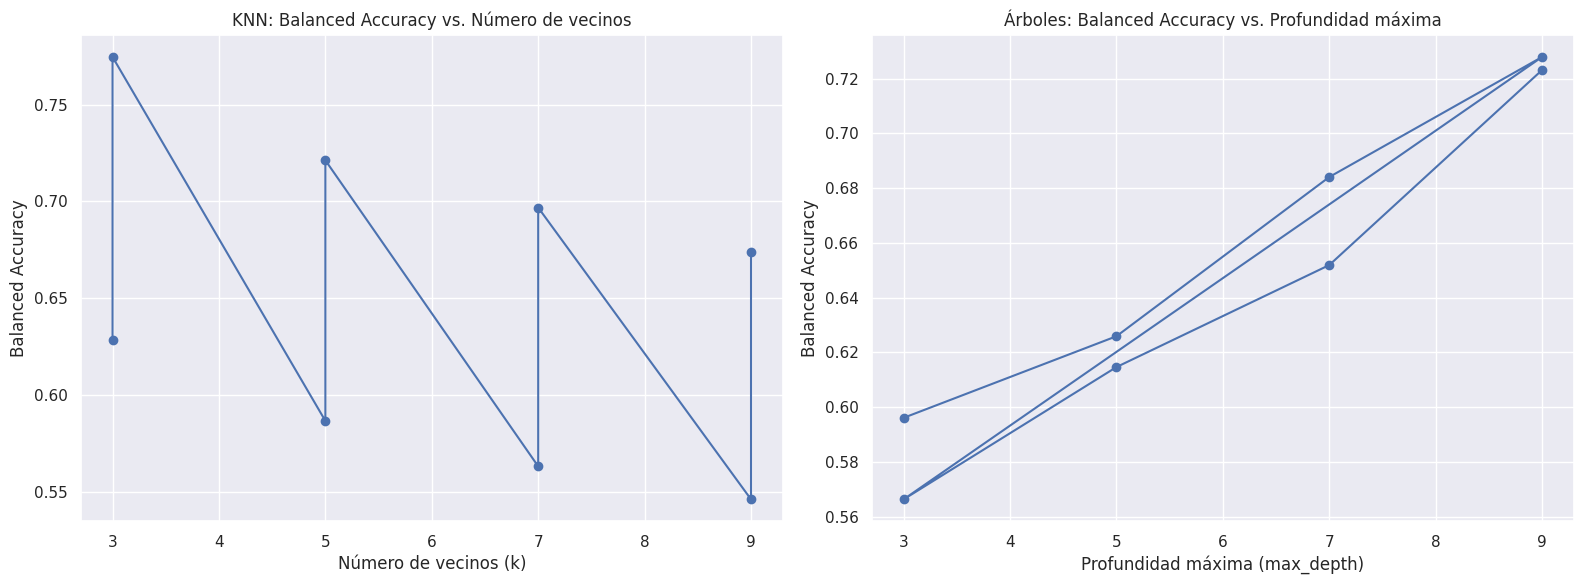

In [72]:
# 1. KNN con hiperparametros por omisión y validación cruzada 3-fold
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('knn', KNeighborsClassifier())
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=cv, scoring='balanced_accuracy')


# 2. KNN con HPO y best_score_
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=cv, scoring='balanced_accuracy')
grid_search_knn.fit(X_train, y_train)


# 3. Árbol con hiperparámetros por omisioń y validación cruzada 3-fold

tree_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('tree', DecisionTreeClassifier())
])

tree_scores = cross_val_score(tree_pipeline, X_train, y_train, cv=cv, scoring='balanced_accuracy')


# 4. Árbol con hiperparámetros optimizados y best_score_

param_grid_tree = {
    'tree__max_depth': [3, 5, 7, 9],  # Example hyperparameters to tune
    'tree__criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=cv, scoring='balanced_accuracy')
grid_search_tree.fit(X_train, y_train)

"""
print("1. KNN con hiperparametros por omisión y validación cruzada 3-fold:", knn_scores.mean())
print("2. KNN con HPO y best_score_:", grid_search_knn.best_score_)
print("3. Árbol con hiperparámetros por omisioń y validación cruzada 3-fold", tree_scores.mean())
print("4. Árbol con hiperparámetros optimizados y best_score_:", grid_search_tree.best_score_)
"""
resultados = {
    "Modelo": ["KNN (omisión, 3-fold)", "KNN (HPO, best_score_)", "Árbol (omisión, 3-fold)", "Árbol (HPO, best_score_)"],
    "Puntuación": [knn_scores.mean(), grid_search_knn.best_score_, tree_scores.mean(), grid_search_tree.best_score_],
}

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# GRAFICAS COMPARATIVAS DE HPO DE KNN Y ARBOLES

# Extraer resultados de la búsqueda de hiperparámetros
results = pd.DataFrame(grid_search_knn.cv_results_)
k_values = results['param_knn__n_neighbors']
scores = results['mean_test_score']

# Datos para el gráfico de árboles de decisión (asumiendo que grid_search_tree está definido)
tree_results = pd.DataFrame(grid_search_tree.cv_results_)
depths = tree_results['param_tree__max_depth']
tree_scores = tree_results['mean_test_score']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Gráfico de KNN
axes[0].plot(k_values, scores, marker='o')
axes[0].set_title('KNN: Balanced Accuracy vs. Número de vecinos')
axes[0].set_xlabel('Número de vecinos (k)')
axes[0].set_ylabel('Balanced Accuracy')
axes[0].grid(True)

# Gráfico de árboles de decisión
axes[1].plot(depths, tree_scores, marker='o')
axes[1].set_title('Árboles: Balanced Accuracy vs. Profundidad máxima')
axes[1].set_xlabel('Profundidad máxima (max_depth)')
axes[1].set_ylabel('Balanced Accuracy')
axes[1].grid(True)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

---
Tras calcular los mejores hiperparametros tenemos cuatro modelos a comparar, donde el modelo de árbol con hiperparámetros por defecto es el mejor de todos. Aún así tenemos que mejorar esta precisión ya que nuestro objetivo es no solo alcanzar, si no superar el modelo dummy del 84% de precisión.

---







Tras escoger el mejor modelo tras variación cruzada, vamos a ver qué tal lo hace con los datos de test.

In [73]:
# Evaluación en test set (outer evaluation)
tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

print("\n=== Evaluación del Árbol con Outer Evaluation ===")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReport:")
print(classification_report(y_test, y_pred))
print("\n=== Diagnóstico de la diferencia de rendimiento ===")
print("Profundidad del árbol simple:", tree_pipeline.named_steps['tree'].get_depth())
print("Parámetros del árbol simple:", tree_pipeline.named_steps['tree'].get_params())

try:
    importances = tree_pipeline.named_steps['tree'].feature_importances_
    print("\nImportancia de características (top 5):")
    feat_importances = pd.Series(importances, index=numeric_features + list(tree_pipeline.named_steps['preprocessor']
                                       .named_transformers_['cat']
                                       .named_steps['encoder']
                                       .get_feature_names_out(categorical_features)))
    print(feat_importances.sort_values(ascending=False).head(5))
except Exception as e:
    print("\nNo se pudo obtener importancia de características:", str(e))


=== Evaluación del Árbol con Outer Evaluation ===
Balanced Accuracy: 0.8102

Matriz de Confusión:
[[745  56]
 [ 48 107]]

Report:
              precision    recall  f1-score   support

          No       0.94      0.93      0.93       801
         Yes       0.66      0.69      0.67       155

    accuracy                           0.89       956
   macro avg       0.80      0.81      0.80       956
weighted avg       0.89      0.89      0.89       956


=== Diagnóstico de la diferencia de rendimiento ===
Profundidad del árbol simple: 14
Parámetros del árbol simple: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Importancia de características (top 5):
TotalWorkingYears          0.112577
hrs                        0.106762
Age         

Mejoremos el modelo usando todos los datos disponibles

In [74]:
# Cargar TODOS los datos disponibles para el modelo final
df_full_train = pd.read_csv('attrition_availabledata_09.csv')

df_full_train = df_full_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
target = 'Attrition'

X_full = df_full_train.drop(target, axis=1)
y_full = df_full_train[target]

X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# Entrenar el modelo final con la parte de entrenamiento de los datos disponibles
tree_pipeline.fit(X_train_full, y_train_full)
print("MODELO ELEGIDO CON TODOS LOS DATOS DISPONIBLES")
val_preds = tree_pipeline.predict(X_val_full)
balanced_acc = balanced_accuracy_score(y_val_full, val_preds)
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print("\nMatríz de confusión:")
print(confusion_matrix(y_val_full, val_preds))
print("\nReport (Validation Set):")
print(classification_report(y_val_full, val_preds))

MODELO ELEGIDO CON TODOS LOS DATOS DISPONIBLES
Balanced Accuracy: 0.8429

Matríz de confusión:
[[473  20]
 [ 26  69]]

Report (Validation Set):
              precision    recall  f1-score   support

          No       0.95      0.96      0.95       493
         Yes       0.78      0.73      0.75        95

    accuracy                           0.92       588
   macro avg       0.86      0.84      0.85       588
weighted avg       0.92      0.92      0.92       588



El valor del balance accuracy es por lo general superior una vez usamos todos los datos disponibles para entrenar al modelo

# Avanzados: Modelos Lineales y SVMS

ELIMINAR EL DE ABAJO

In [75]:
# 1. Cargar y preparar datos (usando mismo preprocesamiento que antes)
df_train = pd.read_csv('attrition_availabledata_09.csv')
df_train = df_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# Definir características
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                  'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
                  'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
target = 'Attrition'

X = df_train.drop(target, axis=1)
y = df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Pipeline de preprocesamiento común
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    print(f"\nTiempo de entrenamiento: {train_time:.4f}s")
    print(f"Tiempo de predicción: {predict_time:.4f}s")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# =================================================================
# 1. MODELOS LINEALES
# =================================================================

print("\n" + "="*60)
print("MODELOS LINEALES")
print("="*60)

# a) Regresión Logística sin regularización
print("\n>>> Regresión Logística sin regularización")
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty=None, max_iter=1000, random_state=42))
])
evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test)

# b) Regresión Logística con regularización L1
print("\n>>> Regresión Logística L1 (Lasso)")
lr_l1_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42))
])
evaluate_model(lr_l1_pipeline, X_train, y_train, X_test, y_test)

# c) Ajuste de hiperparámetros para modelo lineal
print("\n>>> Optimización de hiperparámetros para Regresión Logística")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga', 'liblinear']
}

lr_grid = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    param_grid,
    cv=5,
    scoring='balanced_accuracy'
)

lr_grid = evaluate_model(lr_grid, X_train, y_train, X_test, y_test)
print("\nMejores parámetros encontrados:")
print(lr_grid.best_params_)

# Análisis de características importantes
print("\nAnálisis de características importantes:")
lr_best = lr_grid.best_estimator_.named_steps['classifier']
feature_names = (numeric_features +
                list(lr_grid.best_estimator_.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['encoder']
                     .get_feature_names_out(categorical_features)))

coefs = pd.DataFrame({
    'feature': feature_names,
    'coef': lr_best.coef_[0],
    'abs_coef': np.abs(lr_best.coef_[0])
}).sort_values('abs_coef', ascending=False)

print("\n10 características más importantes:")
print(coefs.head(10))

# =================================================================
# 2. SUPPORT VECTOR MACHINES (SVMs)
# =================================================================

print("\n" + "="*60)
print("SUPPORT VECTOR MACHINES")
print("="*60)

# a) SVM con parámetros por defecto
print("\n>>> SVM con parámetros por defecto")
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
evaluate_model(svm_pipeline, X_train, y_train, X_test, y_test)

# b) Ajuste de hiperparámetros para SVM
print("\n>>> Optimización de hiperparámetros para SVM")
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ]),
    param_grid_svm,
    cv=3,  # Reducido por tiempo de cómputo
    scoring='balanced_accuracy'
)

svm_grid = evaluate_model(svm_grid, X_train, y_train, X_test, y_test)
print("\nMejores parámetros encontrados:")
print(svm_grid.best_params_)

# =================================================================
# 3. COMPARACIÓN FINAL
# =================================================================

print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)

models = {
    'Logistic Regression (default)': lr_pipeline,
    'Logistic Regression (optimized)': lr_grid.best_estimator_,
    'SVM (default)': svm_pipeline,
    'SVM (optimized)': svm_grid.best_estimator_
}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Balanced Accuracy': balanced_acc,
        'Training Time (s)': train_time
    })

results_df = pd.DataFrame(results)
print("\nComparación de rendimiento:")
print(results_df.sort_values('Balanced Accuracy', ascending=False))
# Este modelo intermedio es necesario para mejorarlo usando todos los datos
joblib.dump(svm_grid.best_estimator_, 'modelo_svm_optimizado.pkl')


MODELOS LINEALES

>>> Regresión Logística sin regularización

Tiempo de entrenamiento: 0.0455s
Tiempo de predicción: 0.0120s
Balanced Accuracy: 0.6177

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       822
         Yes       0.63      0.27      0.37       158

    accuracy                           0.86       980
   macro avg       0.75      0.62      0.65       980
weighted avg       0.83      0.86      0.83       980


>>> Regresión Logística L1 (Lasso)

Tiempo de entrenamiento: 0.3548s
Tiempo de predicción: 0.0111s
Balanced Accuracy: 0.6126

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       822
         Yes       0.63      0.25      0.36       158

    accuracy                           0.86       980
   macro avg       0.75      0.61      0.64       980
weighted avg       0.83      0.86      0.83       980


>>> Optimización de

/home/guillermo/Escritorio/UNI/SEGUNDO CUATRI/APRENDIZAJE AUTOMÁTICO/PRACTICA 1/TEST/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guillermo/Escritorio/UNI/SEGUNDO CUATRI/APRENDIZAJE AUTOMÁTICO/PRACTICA 1/TEST/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guillermo/Escritorio/UNI/SEGUNDO CUATRI/APRENDIZAJE AUTOMÁTICO/PRACTICA 1/TEST/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guillermo/Escritorio/UNI/SEGUNDO CUATRI/APRENDIZAJE AUTOMÁTICO/PRACTICA 1/TEST/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver


Tiempo de entrenamiento: 29.3405s
Tiempo de predicción: 0.0112s
Balanced Accuracy: 0.6177

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       822
         Yes       0.63      0.27      0.37       158

    accuracy                           0.86       980
   macro avg       0.75      0.62      0.65       980
weighted avg       0.83      0.86      0.83       980


Mejores parámetros encontrados:
{'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Análisis de características importantes:

10 características más importantes:
                             feature      coef  abs_coef
43              MaritalStatus_Single  0.799076  0.799076
20         BusinessTravel_Non-Travel -0.780241  0.780241
36    JobRole_Manufacturing Director -0.717006  0.717006
40      JobRole_Sales Representative -0.683836  0.683836
0                                hrs  0.645968  0.645968
35                   Jo

/home/guillermo/Escritorio/UNI/SEGUNDO CUATRI/APRENDIZAJE AUTOMÁTICO/PRACTICA 1/TEST/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Comparación de rendimiento:
                             Model  Balanced Accuracy  Training Time (s)
3                  SVM (optimized)           0.875250           0.230415
2                    SVM (default)           0.688049           0.186832
1  Logistic Regression (optimized)           0.617705           2.507683
0    Logistic Regression (default)           0.617705           0.038225


['modelo_svm_optimizado.pkl']

<Figure size 800x400 with 0 Axes>

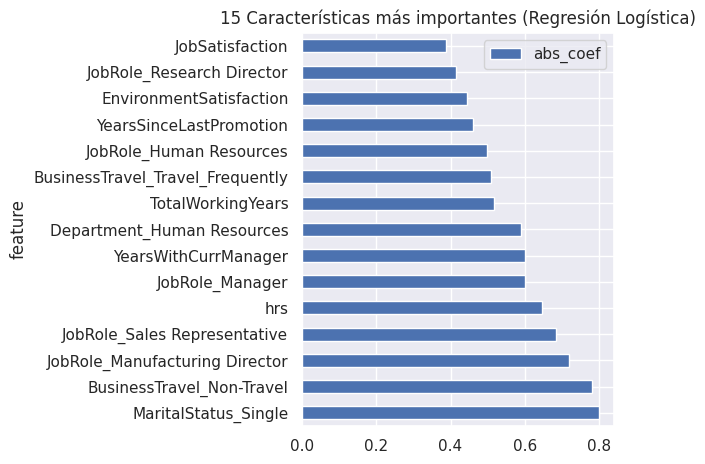

In [76]:
# Gráfico de características importantes
plt.figure(figsize=(8, 4))
coefs.head(15).plot.barh(x='feature', y='abs_coef')
plt.title('15 Características más importantes (Regresión Logística)')
plt.tight_layout()
plt.show()

MEJORA DEL MEJOR MODELO HASTA EL MOMENTO CON LOS DATOS COMPLETOS.

Cargando el modelo SVM optimizado...
Entrenando el modelo SVM optimizado con los datos de entrenamiento...
Evaluando en el conjunto de validación...
Balanced Accuracy (on validation set): 0.9004

Confusion Matrix (Validation Set):
[[483  10]
 [ 17  78]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

          No       0.97      0.98      0.97       493
         Yes       0.89      0.82      0.85        95

    accuracy                           0.95       588
   macro avg       0.93      0.90      0.91       588
weighted avg       0.95      0.95      0.95       588



/tmp/ipykernel_1464800/2047026174.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=results_df, x='Balanced Accuracy', y='Model', palette='viridis', edgecolor='black')


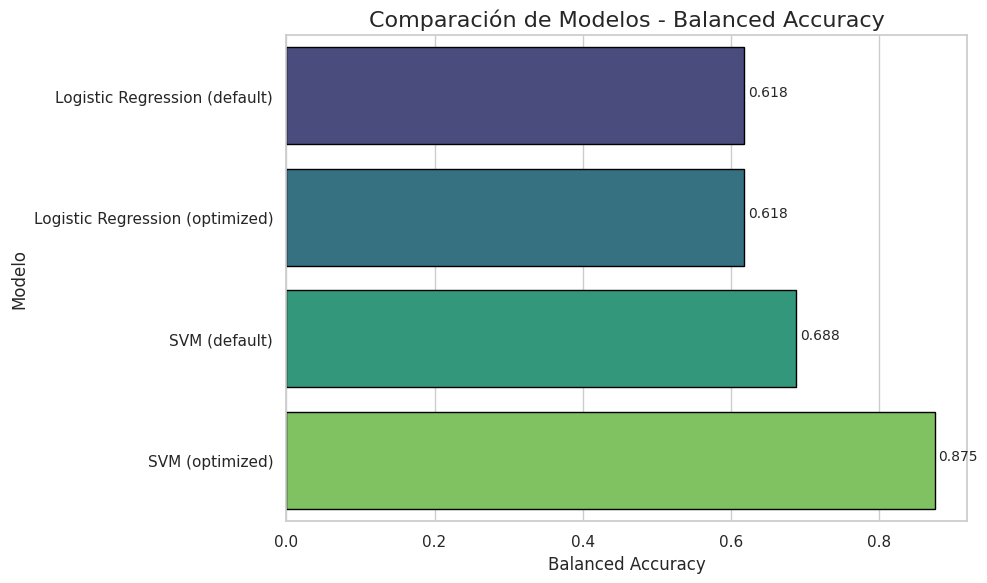

In [77]:
# 1. Cargar TODOS los datos disponibles para el modelo final
df_full_train = pd.read_csv('attrition_availabledata_09.csv')

df_full_train = df_full_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
target = 'Attrition'

X_full = df_full_train.drop(target, axis=1)
y_full = df_full_train[target]

X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)


print("Cargando el modelo SVM optimizado...")
svm_pipeline = joblib.load('modelo_svm_optimizado.pkl')

print("Entrenando el modelo SVM optimizado con los datos de entrenamiento...")
svm_pipeline.fit(X_train_full, y_train_full)

# Evaluar en validación
print("Evaluando en el conjunto de validación...")
val_preds = svm_pipeline.predict(X_val_full)
balanced_acc = balanced_accuracy_score(y_val_full, val_preds)
print(f"Balanced Accuracy (on validation set): {balanced_acc:.4f}")

print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val_full, val_preds))
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_full, val_preds))



# Estilo bonito
sns.set(style='whitegrid')

# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear barplot
ax = sns.barplot(data=results_df, x='Balanced Accuracy', y='Model', palette='viridis', edgecolor='black')

# Etiquetas
plt.title('Comparación de Modelos - Balanced Accuracy', fontsize=16)
plt.xlabel('Balanced Accuracy', fontsize=12)
plt.ylabel('Modelo', fontsize=12)

# Mostrar valores en cada barra
for i in ax.patches:
    ax.text(i.get_width() + 0.005, i.get_y() + 0.4, f'{i.get_width():.3f}', fontsize=10)

plt.tight_layout()
plt.show()

# Resultados y modelo final

El mejor modelo hasta el momento ha sido un SVM con hiperparámetros optimizados y entrenamiento con el dataset completo, que nos da un 90% (en términos generales, ya que cada ejecución puede variar) y por tanto supera al modelo dummy que se comentó al principio. El modelo final será elegido tras realizar la tarea abierta, donde usaremos el modelo del xgboost, que aumenta el balance accuracy de nuestro modelo hasta un 91,92% (en términos generales). Con ese modelo se harán las predicciones del dataset de competición.

# Elección abierta


Hemos decidido usar el modelo final obtenido de el xgboost de la elección abierta, ya que mejoraba el rendimiento del modelo final previo.

[0]	validation_0-logloss:0.66507
[1]	validation_0-logloss:0.63903
[2]	validation_0-logloss:0.62364
[3]	validation_0-logloss:0.59780
[4]	validation_0-logloss:0.57773
[5]	validation_0-logloss:0.55835
[6]	validation_0-logloss:0.54178
[7]	validation_0-logloss:0.52514
[8]	validation_0-logloss:0.51348
[9]	validation_0-logloss:0.50048
[10]	validation_0-logloss:0.48449
[11]	validation_0-logloss:0.47366
[12]	validation_0-logloss:0.46053
[13]	validation_0-logloss:0.45170
[14]	validation_0-logloss:0.44284
[15]	validation_0-logloss:0.43592
[16]	validation_0-logloss:0.42712
[17]	validation_0-logloss:0.41638
[18]	validation_0-logloss:0.40959
[19]	validation_0-logloss:0.40388
[20]	validation_0-logloss:0.39919
[21]	validation_0-logloss:0.39309
[22]	validation_0-logloss:0.38566
[23]	validation_0-logloss:0.37920
[24]	validation_0-logloss:0.37356
[25]	validation_0-logloss:0.36707
[26]	validation_0-logloss:0.36070
[27]	validation_0-logloss:0.35474
[28]	validation_0-logloss:0.35137
[29]	validation_0-loglos

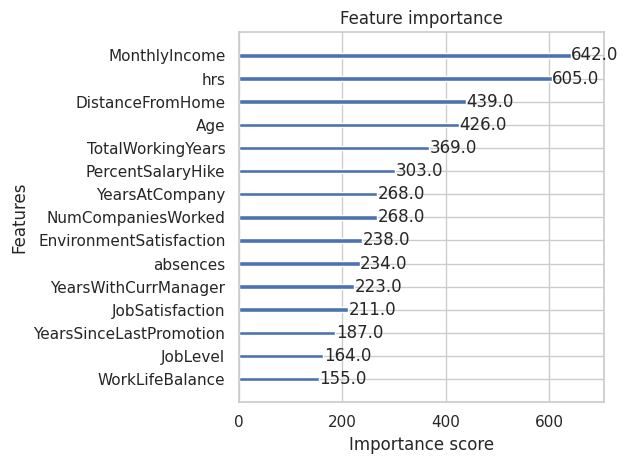


🔹 Modelo guardado como 'modelo_final_GuillermoAsier.pkl'


In [78]:

# 1. Cargar y preparar datos
df = pd.read_csv('attrition_availabledata_09.csv')
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# Codificar target y variables categóricas
le = LabelEncoder()
y = le.fit_transform(df['Attrition'])
X = df.drop('Attrition', axis=1)
X = pd.get_dummies(X)

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Configuración de XGBoost para datos desbalanceados
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=sum(y_train == 0)/sum(y_train == 1),  # Auto-balanceo
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=10
)

# 3. Entrenamiento con evaluación
start_time = time.time()
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)
train_time = time.time() - start_time

# 4. Evaluación
y_pred = model.predict(X_test)
print(f"\n⏱ Tiempo entrenamiento: {train_time:.2f}s")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Visualización de características importantes
xgb.plot_importance(model, max_num_features=15)
plt.tight_layout()
plt.show()

# 6. Guardar modelo
joblib.dump(model, 'modelo_final_GuillermoAsier.pkl')
print("\n🔹 Modelo guardado como 'modelo_final_GuillermoAsier.pkl'")